# 比较多个PyWGCNA
PyWGCNA还支持将两个以上的PyWGCNA对象相互比较，以了解跨运行的可重复模块的情况。
首先，使用`readWGCNA（）`函数读取PyWGCNa对象。

在本教程中，我使用了来自三种不同鼠标模型的三个数据集：
1. 5xPAD小鼠模型：[阿尔茨海默病5xPAD鼠模型的系统表型和特征](https://www.nature.com/articles/s41597-021-01054-y)
2. 3xTg-AD小鼠模型：[阿尔茨海默病3xTg-阿尔茨海默病小鼠模型的系统表型和特征](https://www.frontiersin.org/articles/10.3389/fnins.2021.785276/full)
3. Trem2:[没有隐性剪接的Trem2*R47H小鼠模型驱动年龄和疾病依赖性组织损伤和斑块反应的突触损失](https://www.biorxiv.org/content/10.1101/2022.03.09.483490v1.abstract)

我分别在每个PyWGCNA中应用了默认参数，然后比较了它们的模块

## 读取所有PyWGCNA对象

In [1]:
import PyWGCNA
pyWGCNA_5xFAD = PyWGCNA.readWGCNA("5xFAD.p")
pyWGCNA_3xTgAD = PyWGCNA.readWGCNA("3xTgAD_paper/3xTgAD.p")
pyWGCNA_Trem2 = PyWGCNA.readWGCNA("modelAD_TREM2_5xFAD_BL6_4mon_12mon.p")
pyWGCNA_Trem2.name = "TREM2"

Reading 5xFAD WGCNA done!
Reading 3xTgAD WGCNA done!
Reading modelAD_TREM2_5xFAD_BL6_4mon_12mon WGCNA done!


## 比较两个或多个PyWGCNA对象
读取对象后，您只需在两个PyWGCNA上调用`compareNetworks()`函数，比较结果将存储在三个表中：

1. Jaccard相似性矩阵，报告网络中每个模块之间的相似性
2. 分数矩阵，报告网络中每个模块之间的共同基因分数
3. P值矩阵，报告网络中每组模块之间相似性的重要性

In [2]:
comparison = PyWGCNA.compareNetworks(PyWGCNAs = [pyWGCNA_5xFAD, 
                                                 pyWGCNA_3xTgAD,
                                                 pyWGCNA_Trem2])

### Jacard相似性矩阵

In [3]:
comparison.jaccard_similarity.head(5)

5xFAD:darkred  5xFAD:darkgrey  5xFAD:coral  5xFAD:gainsboro  \
5xFAD:darkred              1.0             0.0          0.0              0.0   
5xFAD:darkgrey             0.0             1.0          0.0              0.0   
5xFAD:coral                0.0             0.0          1.0              0.0   
5xFAD:gainsboro            0.0             0.0          0.0              1.0   
5xFAD:rosybrown            0.0             0.0          0.0              0.0   

                 5xFAD:rosybrown  5xFAD:brown  5xFAD:white  5xFAD:black  \
5xFAD:darkred                0.0          0.0          0.0          0.0   
5xFAD:darkgrey               0.0          0.0          0.0          0.0   
5xFAD:coral                  0.0          0.0          0.0          0.0   
5xFAD:gainsboro              0.0          0.0          0.0          0.0   
5xFAD:rosybrown              1.0          0.0          0.0          0.0   

                 5xFAD:silver  5xFAD:indianred  ...  3xTgAD:indianred  \
5xFAD:darkred             0.0              0.0  ...          0.005508   
5xFAD:darkgrey            0.0              0.0  ...          0.000695   
5xFAD:coral               0.0              0.0  ...          0.000000   
5xFAD:gainsboro           0.0              0.0  ...          0.000649   
5xFAD:rosybrown           0.0              0.0  ...          0.000816   

                 3xTgAD:red  TREM2:dimgray  TREM2:darkgray  TREM2:darkgrey  \
5xFAD:darkred      0.003858       0.050857        0.282436        0.029548   
5xFAD:darkgrey     0.000000       0.128569        0.164645        0.095109   
5xFAD:coral        0.000720       0.022397        0.023282        0.014842   
5xFAD:gainsboro    0.000653       0.052051        0.137429        0.035941   
5xFAD:rosybrown    0.001661       0.022080        0.048564        0.059385   

                 TREM2:lightgrey  TREM2:lightgray  TREM2:rosybrown  \
5xFAD:darkred           0.001586         0.001333         0.000646   
5xFAD:darkgrey          0.003875         0.005478         0.004935   
5xFAD:coral             0.034158         0.439916         0.000000   
5xFAD:gainsboro         0.007932         0.002963         0.006196   
5xFAD:rosybrown         0.011583         0.003228         0.000720   

                 TREM2:indianred  TREM2:brown  
5xFAD:darkred           0.000000     0.005247  
5xFAD:darkgrey          0.000227     0.002515  
5xFAD:coral             0.000000     0.015110  
5xFAD:gainsboro         0.029754     0.003501  
5xFAD:rosybrown         0.016104     0.013312  

[5 rows x 42 columns]

### 分数矩阵

In [4]:
comparison.fraction.head(5)

5xFAD:darkred  5xFAD:darkgrey  5xFAD:coral  5xFAD:gainsboro  \
5xFAD:darkred              1.0             0.0          0.0              0.0   
5xFAD:darkgrey             0.0             1.0          0.0              0.0   
5xFAD:coral                0.0             0.0          1.0              0.0   
5xFAD:gainsboro            0.0             0.0          0.0              1.0   
5xFAD:rosybrown            0.0             0.0          0.0              0.0   

                 5xFAD:rosybrown  5xFAD:brown  5xFAD:white  5xFAD:black  \
5xFAD:darkred                0.0          0.0          0.0          0.0   
5xFAD:darkgrey               0.0          0.0          0.0          0.0   
5xFAD:coral                  0.0          0.0          0.0          0.0   
5xFAD:gainsboro              0.0          0.0          0.0          0.0   
5xFAD:rosybrown              1.0          0.0          0.0          0.0   

                 5xFAD:silver  5xFAD:indianred  ...  3xTgAD:indianred  \
5xFAD:darkred             0.0              0.0  ...         66.666667   
5xFAD:darkgrey            0.0              0.0  ...          4.000000   
5xFAD:coral               0.0              0.0  ...          0.000000   
5xFAD:gainsboro           0.0              0.0  ...          2.666667   
5xFAD:rosybrown           0.0              0.0  ...          1.333333   

                 3xTgAD:red  TREM2:dimgray  TREM2:darkgray  TREM2:darkgrey  \
5xFAD:darkred     63.636364      26.284875       34.036272       21.428571   
5xFAD:darkgrey     0.000000      35.046500       17.750196       35.000000   
5xFAD:coral        1.818182       3.622124        2.458276        2.857143   
5xFAD:gainsboro    3.636364      12.236907       14.273664       10.928571   
5xFAD:rosybrown    3.636364       3.377386        4.952702       10.214286   

                 TREM2:lightgrey  TREM2:lightgray  TREM2:rosybrown  \
5xFAD:darkred           3.562945         1.820728         2.521008   
5xFAD:darkgrey          4.275534         3.781513         9.243697   
5xFAD:coral            13.776722        87.675070         0.000000   
5xFAD:gainsboro         6.413302         1.540616         8.403361   
5xFAD:rosybrown         4.275534         0.840336         0.420168   

                 TREM2:indianred  TREM2:brown  
5xFAD:darkred           0.000000    33.566434  
5xFAD:darkgrey          0.574713     7.692308  
5xFAD:coral             0.000000    15.384615  
5xFAD:gainsboro        52.873563     7.692308  
5xFAD:rosybrown        12.068966    11.888112  

[5 rows x 42 columns]

### P-value matrix(P值矩阵)

In [5]:
comparison.P_value.head(5)

5xFAD:darkred  5xFAD:darkgrey  5xFAD:coral  5xFAD:gainsboro  \
5xFAD:darkred              0.0             0.0          0.0              0.0   
5xFAD:darkgrey             0.0             0.0          0.0              0.0   
5xFAD:coral                0.0             0.0          0.0              0.0   
5xFAD:gainsboro            0.0             0.0          0.0              0.0   
5xFAD:rosybrown            0.0             0.0          0.0              0.0   

                 5xFAD:rosybrown  5xFAD:brown  5xFAD:white  5xFAD:black  \
5xFAD:darkred                0.0          0.0          0.0          0.0   
5xFAD:darkgrey               0.0          0.0          0.0          0.0   
5xFAD:coral                  0.0          0.0          0.0          0.0   
5xFAD:gainsboro              0.0          0.0          0.0          0.0   
5xFAD:rosybrown              0.0          0.0          0.0          0.0   

                 5xFAD:silver  5xFAD:indianred  ...  3xTgAD:indianred  \
5xFAD:darkred             0.0              0.0  ...      6.466813e-08   
5xFAD:darkgrey            0.0              0.0  ...      1.549762e-03   
5xFAD:coral               0.0              0.0  ...      3.365380e-02   
5xFAD:gainsboro           0.0              0.0  ...      1.050025e-02   
5xFAD:rosybrown           0.0              0.0  ...      2.642452e-01   

                 3xTgAD:red  TREM2:dimgray  TREM2:darkgray  TREM2:darkgrey  \
5xFAD:darkred      0.000025   1.688684e-19    6.387580e-08    5.768388e-31   
5xFAD:darkgrey     0.000077  2.063421e-101    2.960338e-13    1.626134e-67   
5xFAD:coral        0.369302   5.899273e-04   7.715663e-149    1.754387e-05   
5xFAD:gainsboro    0.059692   4.514326e-01    3.281056e-71    3.694657e-01   
5xFAD:rosybrown    1.000000   1.198145e-02    5.164408e-07    1.380196e-20   

                 TREM2:lightgrey  TREM2:lightgray  TREM2:rosybrown  \
5xFAD:darkred       1.669726e-57    2.021232e-113     6.377326e-36   
5xFAD:darkgrey      8.139895e-15     4.871405e-27     1.534018e-03   
5xFAD:coral         3.319226e-11     0.000000e+00     5.313190e-06   
5xFAD:gainsboro     3.127443e-04     1.850737e-25     1.279458e-01   
5xFAD:rosybrown     1.000000e+00     2.051904e-08     4.019121e-04   

                 TREM2:indianred  TREM2:brown  
5xFAD:darkred       2.270531e-33     0.725863  
5xFAD:darkgrey      1.556856e-12     0.003082  
5xFAD:coral         1.953197e-04     0.000005  
5xFAD:gainsboro     3.585803e-40     0.151370  
5xFAD:rosybrown     3.640674e-05     0.000234  

[5 rows x 42 columns]

## 绘制结果
有两种方法可以绘制结果：
1. 使用`plot_Jaccard_similarity()`函数将Jaccard相似性矩阵显示为图形。
2. 使用`plotHeatmapComparison()`函数一次显示所有三个矩阵。

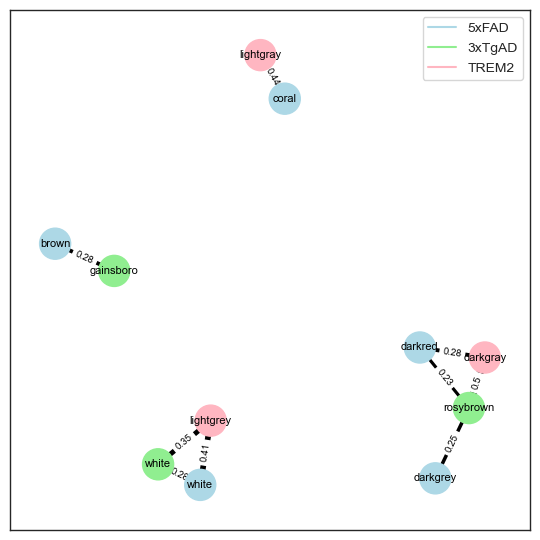

In [6]:
color = {"5xFAD": "lightblue", 
         "3xTgAD": "lightgreen", 
         "TREM2": "lightpink"}
comparison.plotJaccardSimilarity(color=color,
                                   cutoff=0.2,
                                   plot_format="pdf",
                                   file_name="jaccard_similarity_5xFAD_3xTgAD_Trem2")

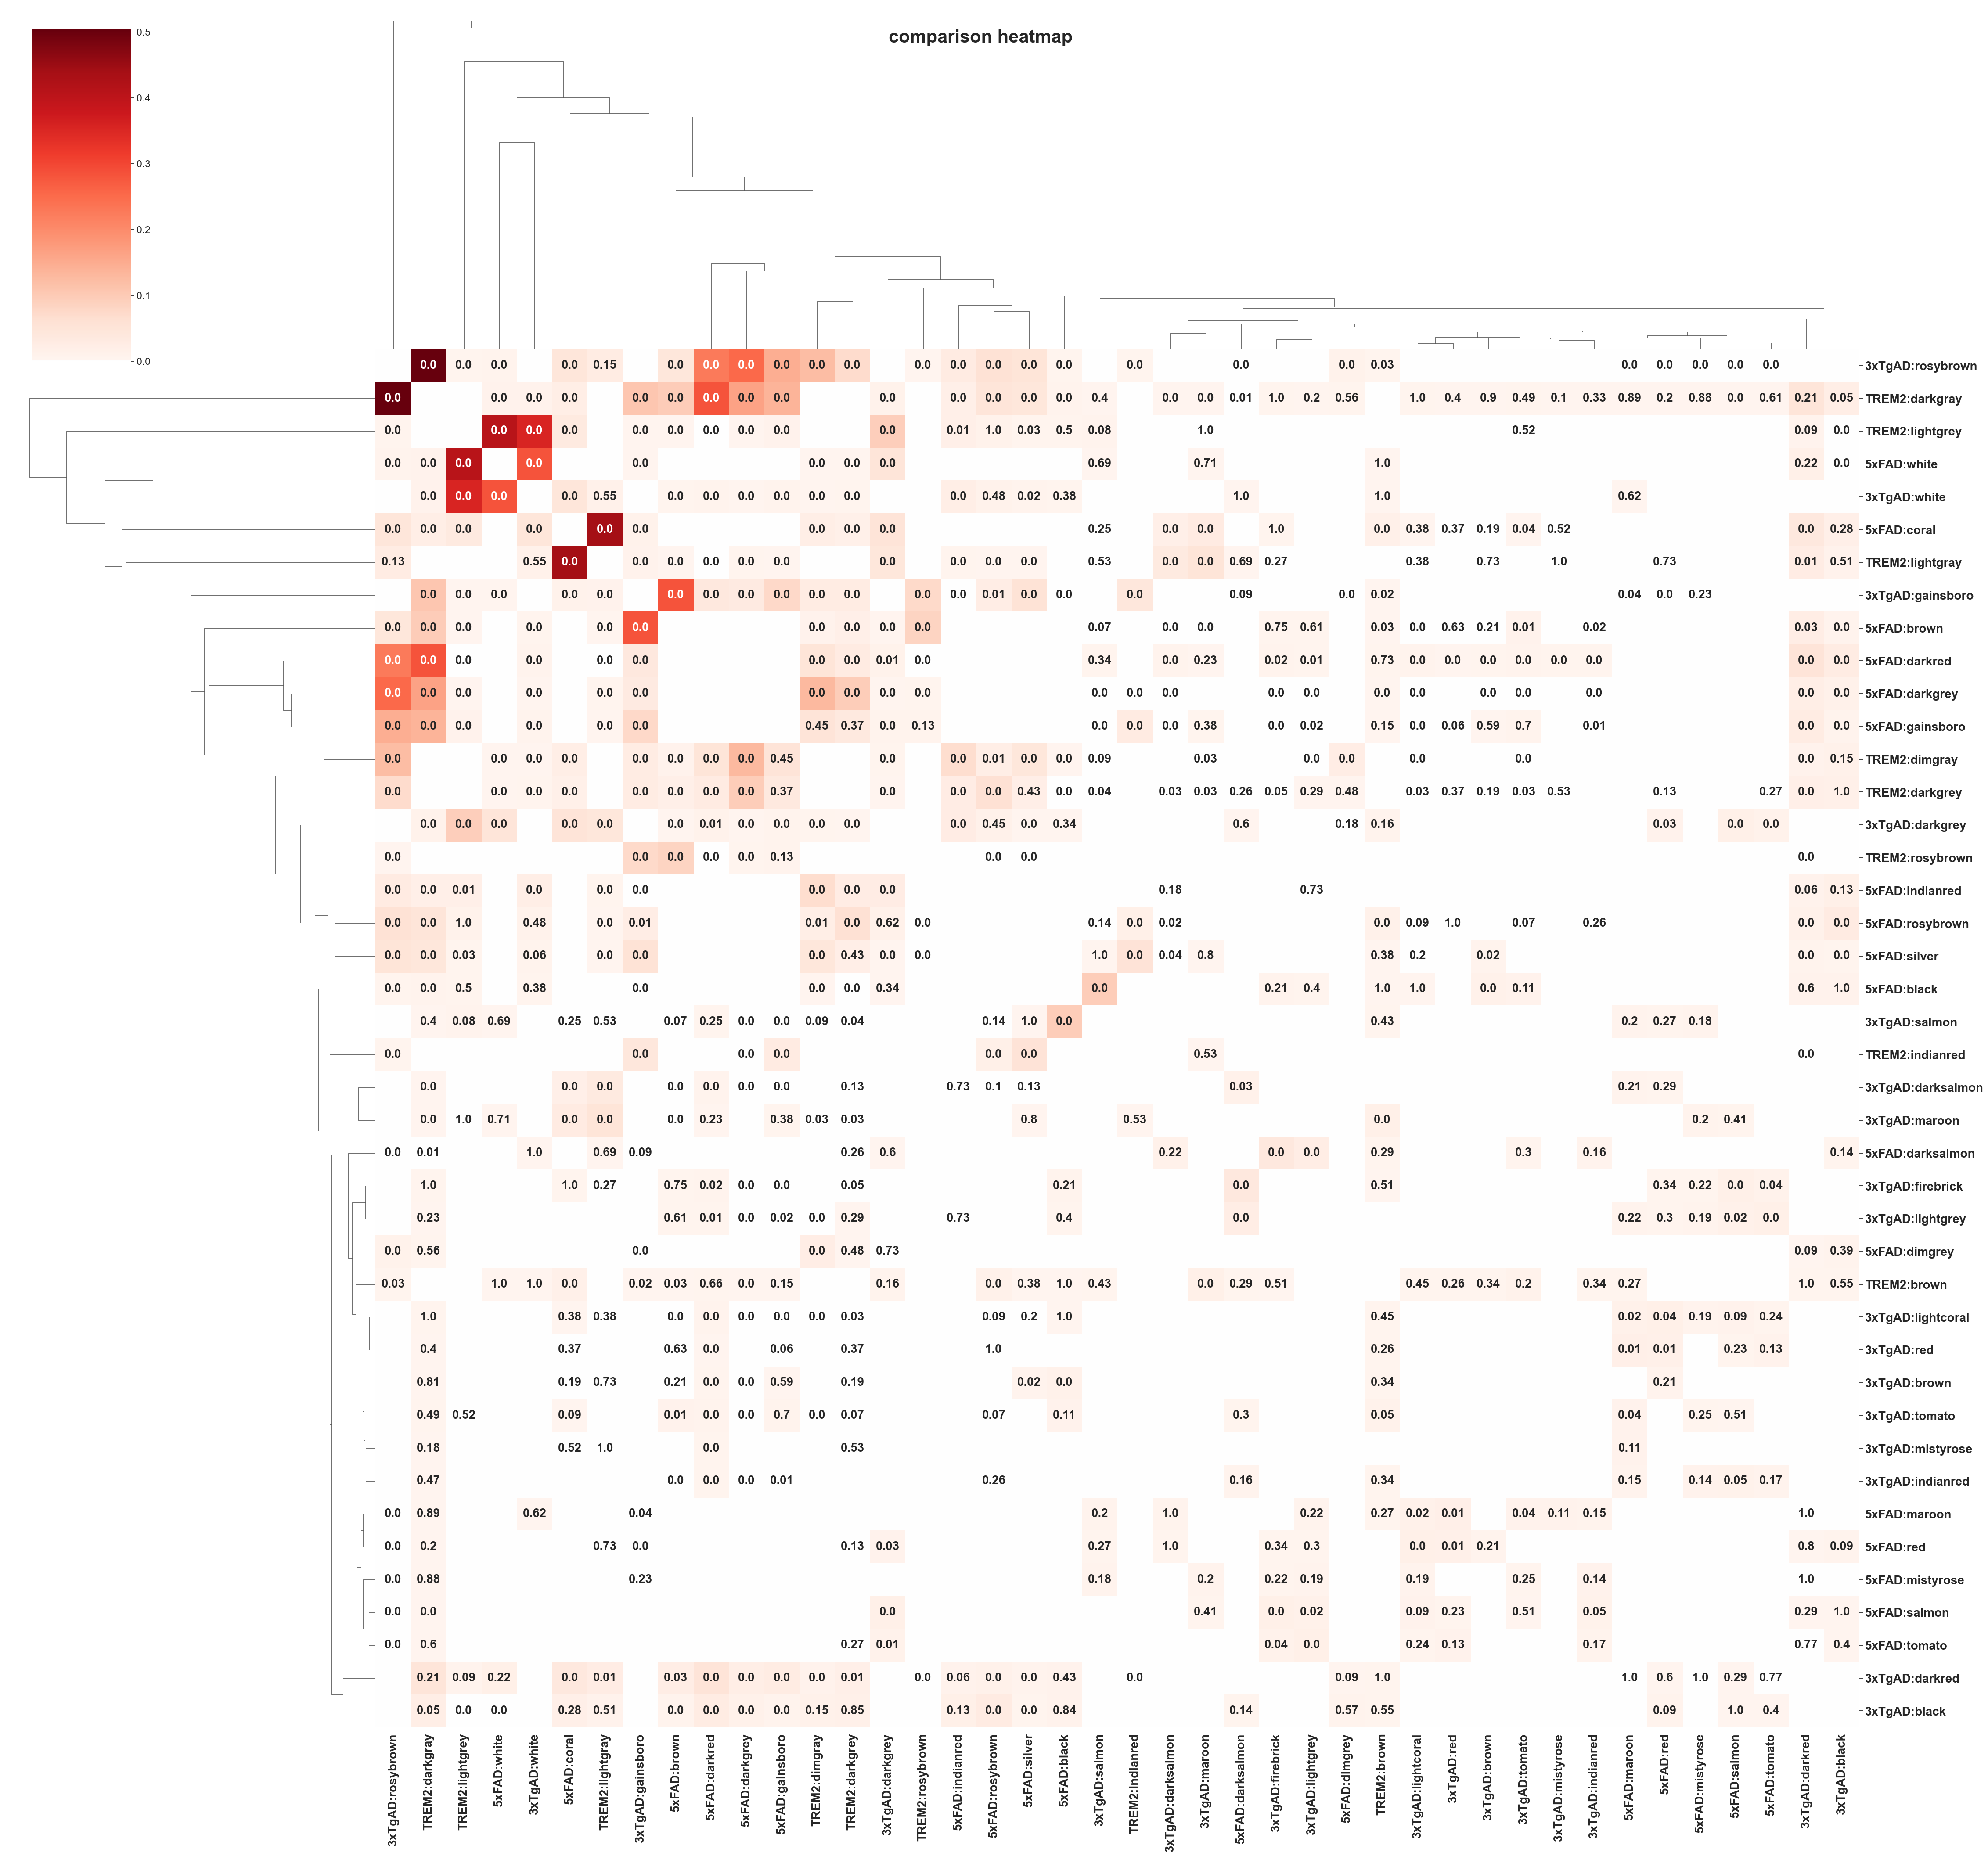

In [7]:
comparison.plotHeatmapComparison(plot_format="pdf",
                                 file_name="heatmap_comparison_5xFAD_3xTgAD_Trem2")

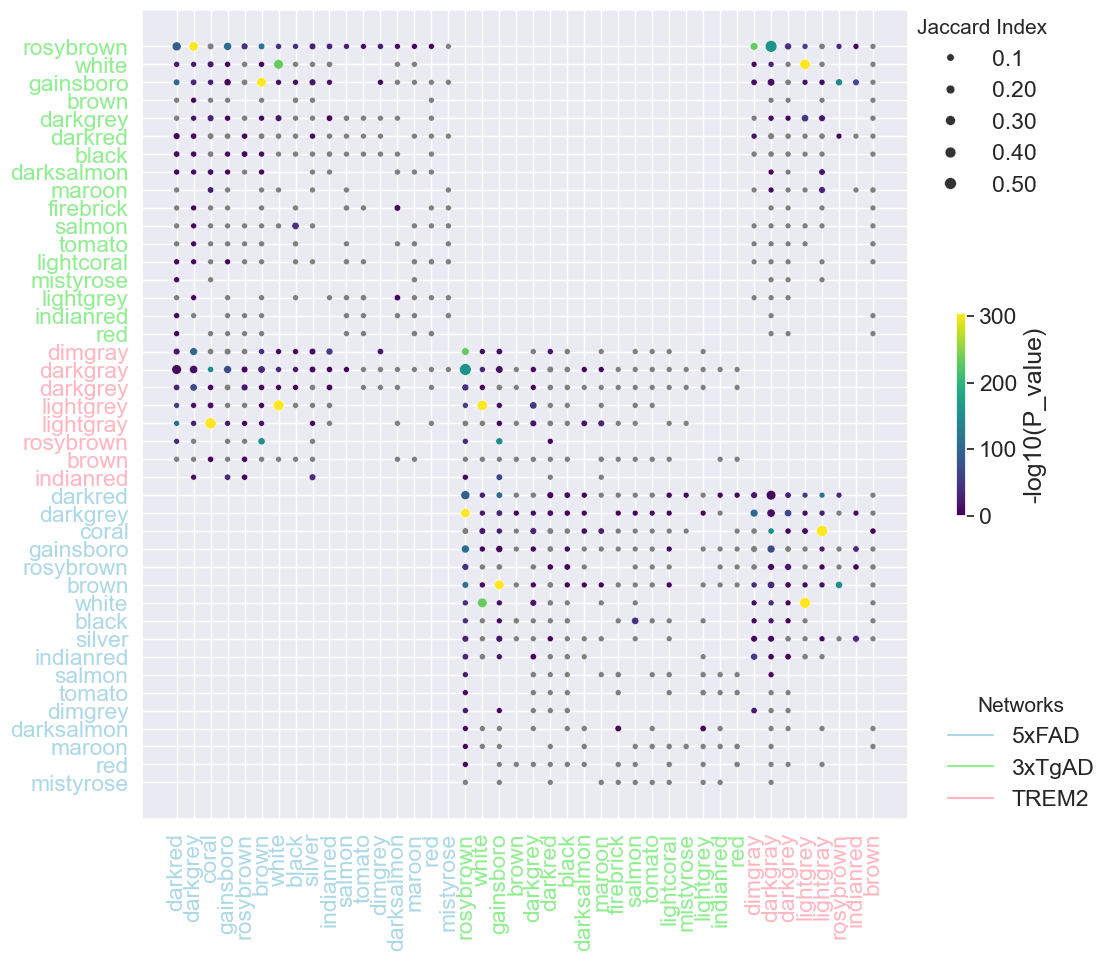

In [8]:
color = {"5xFAD": "lightblue", 
         "3xTgAD": "lightgreen", 
         "TREM2": "lightpink"}
comparison.plotBubbleComparison(color=color,
                                plot_format="pdf",
                                file_name="bubble_comparison_5xFAD_3xTgAD_Trem2")

## 保存和加载比较对象
您可以分别使用`saveCompare()`或`readComparison()`函数保存或加载比较对象。

In [9]:
comparison.saveComparison(name="comparison_5xFAD_3xTgAD_Trem2")

Saving comparison as comparison_5xFAD_3xTgAD_Trem2.p


In [1]:
import PyWGCNA
comparison = PyWGCNA.readComparison('comparison_5xFAD_3xTgAD_Trem2.p')

Reading comparison done!
